<img src="tsf.png"> 

# Decision Tree:
## *It is a tree that has flowchart like structure, and it is used for the PREDICTION and CLASSIFICATION   of data.
### *The leaf nodes of decision tree represents the class labels=(yes/no;Risk/Safe),top node is root.

# Task:
## *From the given Iris data set,we need to predict the clusters and represent them in the visual format

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
%matplotlib inline

In [33]:
df=pd.read_csv('Iris.csv')
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
df.info()  #shows the entire information about dataset
df.describe() #it describe all the highest,lowest,count and medium values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Pairplot: it plots pair-wise relationship in a dataset
## It describes the dataset in visual format and it says given dataset contains 4 features and 3 species,as you can see below. 

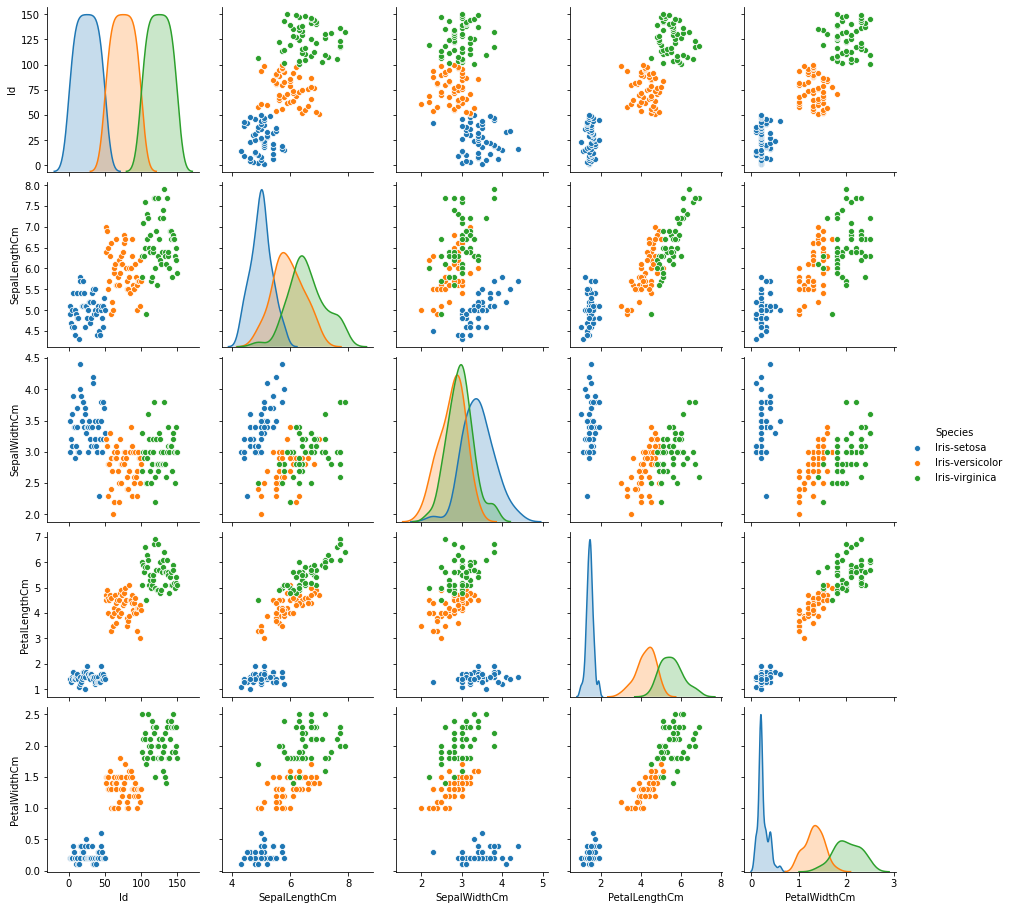

In [63]:
sns.pairplot(df, hue='Species')

In [64]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [99]:
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()
y=lbe.fit_transform(y)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=50)

## Decision tree classifier algorithm 

In [100]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(xtrain,ytrain)    

DecisionTreeClassifier()

In [101]:
ypred=dc.predict(xtest)  # predicting on the testing data.
ypred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2], dtype=int64)

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

### The accuracy we achieved is almost 1

In [103]:
accuracy_score(ytest,ypred)

0.9666666666666667

### the classified Data

In [104]:
print("Classification Report is:\n")
print(classification_report(ytest,ypred))

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [105]:
print("Confusion Matrix is:\n")
print(confusion_matrix(ytest,ypred))

Confusion Matrix is:

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


### Final Decision tree

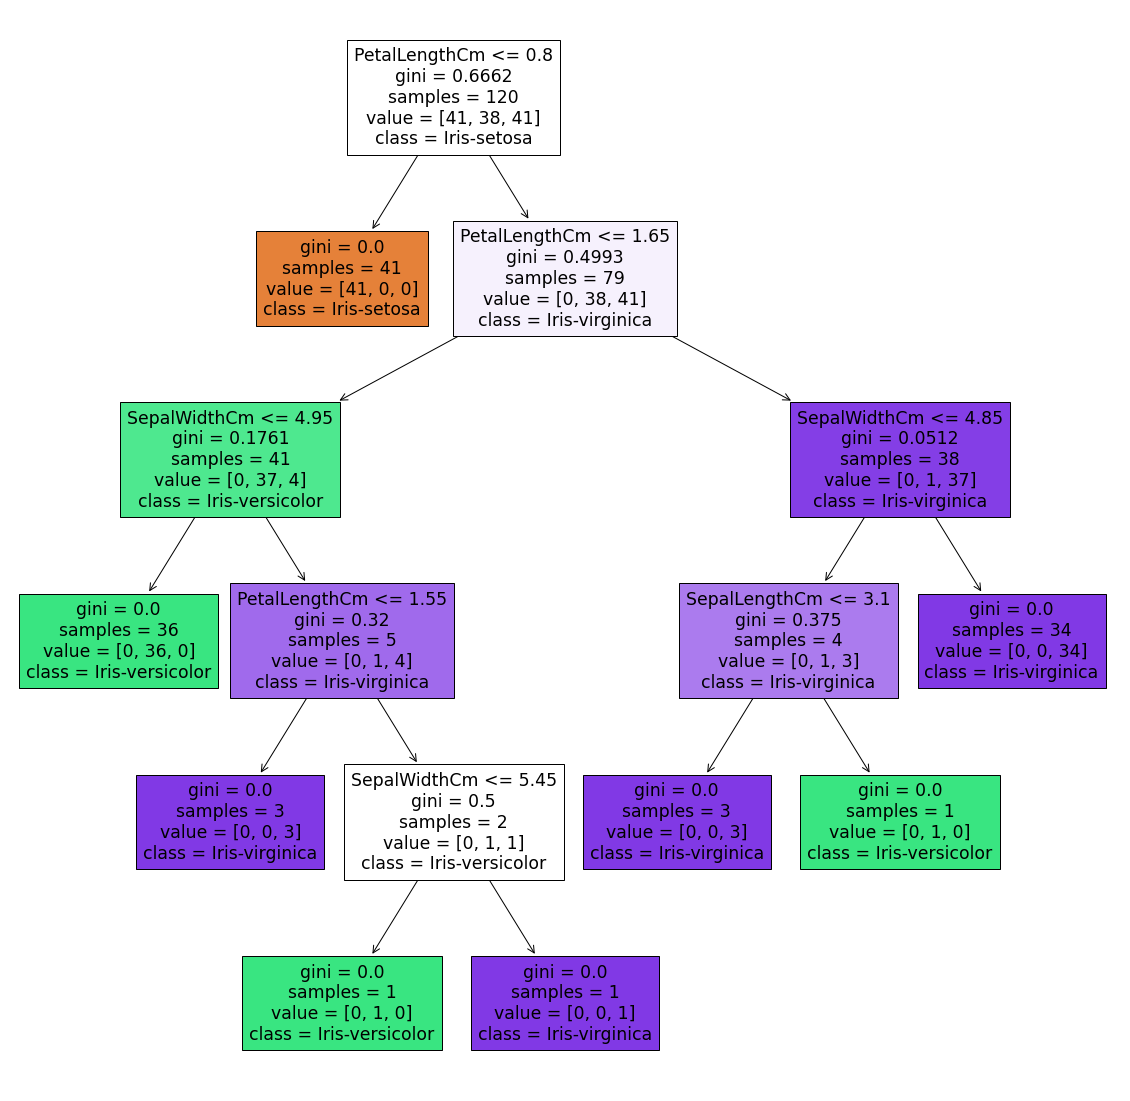

In [106]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree_img= plot_tree(dc,feature_names=df.columns, class_names=df['Species'].unique().tolist(),
                   precision=4,label="all",filled=True)
plt.show()